# Choose the Number of Clusters

The most suitable solution, using the within-cluster sum of squares (WCSS) for clustering with 1 to 10 clusters.


## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [2]:
df = pd.read_csv("Countries.csv")
df

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


Remove the unnecessary columns

In [3]:
df = df.iloc[:,1:3]
df

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


## Plot the data

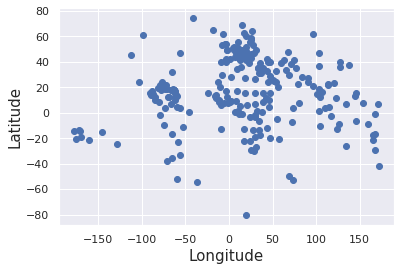

In [4]:
x = df["Longitude"]
y = df["Latitude"]
plt.scatter(x,y)
plt.xlabel("Longitude",fontsize=15)
plt.ylabel("Latitude",fontsize=15)
plt.show()


## Select the features

In [27]:
x = df

## Clustering

Use 4 clusters initially.

In [28]:
cluster = KMeans(n_clusters=7).fit(x)
cluster.labels_

array([1, 3, 4, 1, 0, 0, 0, 3, 1, 3, 5, 4, 2, 4, 1, 2, 0, 3, 4, 0, 6, 6,
       3, 0, 3, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 3, 4, 6, 0, 1, 3, 6, 6,
       4, 6, 5, 1, 4, 6, 1, 1, 1, 1, 0, 0, 0, 0, 4, 1, 0, 1, 6, 1, 0, 4,
       0, 0, 4, 0, 2, 1, 0, 0, 2, 6, 0, 0, 0, 6, 6, 6, 6, 6, 0, 1, 0, 1,
       2, 1, 2, 4, 1, 0, 1, 0, 2, 0, 3, 2, 4, 0, 3, 3, 0, 0, 0, 1, 0, 0,
       2, 3, 3, 4, 3, 2, 1, 1, 2, 0, 3, 3, 0, 6, 0, 1, 0, 3, 4, 0, 0, 0,
       2, 1, 6, 0, 0, 4, 3, 1, 2, 0, 6, 0, 3, 0, 3, 2, 4, 6, 1, 4, 4, 2,
       4, 2, 6, 2, 6, 1, 5, 0, 0, 3, 2, 2, 3, 3, 1, 5, 1, 2, 2, 2, 0, 1,
       2, 0, 1, 0, 5, 3, 0, 3, 4, 6, 3, 4, 4, 6, 2, 1, 6, 2, 6, 1, 0, 4,
       4, 1, 0, 6, 1, 0, 0, 0, 4, 1, 4, 0, 1, 6, 6, 3, 3, 3, 2, 5, 1, 0,
       0, 2, 4, 4, 0, 1, 1, 3, 0, 1, 1, 1, 1, 2, 2, 5, 5, 3, 4, 4, 4],
      dtype=int32)

### Clustering results

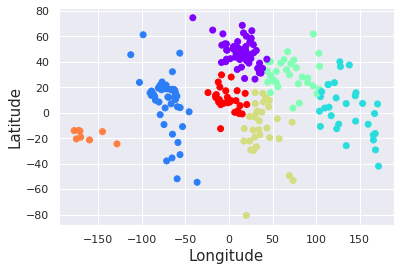

In [29]:
x = df["Longitude"]
y = df["Latitude"]
plt.scatter(x,y,c=cluster.labels_,cmap="rainbow")
plt.xlabel("Longitude",fontsize=15)
plt.ylabel("Latitude",fontsize=15)
plt.show()

## Selecting the number of clusters

### Within-cluster Sum of Squares (WCSS)

Use the ingerated <i>sklearn</i> method <i> 'inertia_' </i>.

In [30]:
cluster.inertia_

126932.39710026012

Write a loop that calculates and saves the WCSS for any number of clusters from 1 up to 10 (or more if you wish).

In [31]:
x = df
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for.
# Note that 'range' doesn't include the upper boundery
cluster_number = 11
for i in range (1,cluster_number):
    cluster = KMeans(n_clusters=i).fit(x)
    wcss_iter = cluster.inertia_
    wcss.append(wcss_iter)

Text(0, 0.5, 'Within-cluster Sum of Squares')

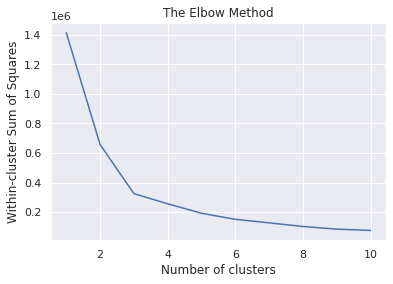

In [32]:
cluster_number = range(1,cluster_number)
plt.plot(cluster_number, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

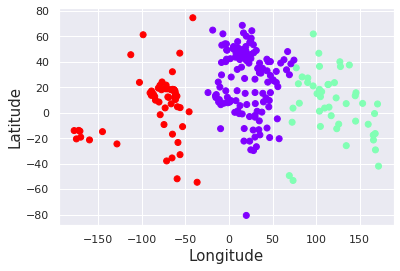

In [33]:
cluster = KMeans(n_clusters=3).fit(x)
cluster.labels_
x = df["Longitude"]
y = df["Latitude"]
plt.scatter(x,y,c=cluster.labels_,cmap="rainbow")
plt.xlabel("Longitude",fontsize=15)
plt.ylabel("Latitude",fontsize=15)
plt.show()

In this this specific case, that would be 2 or 3 clusters to best fit the data